# 분석의 목적(문제 정의) : 데이터를 탐색하여 다음 분기에 어떤 게임을 설계해야 좋을지 인사이트 뽑기

## 데이터 탐색

In [1]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
# 나눔바른고딕체 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [3]:
# matplotlib 버전 upgrade
!pip install matplotlib -U
import matplotlib as mpl
mpl.__version__

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.4.2)


'3.4.2'

In [4]:
# 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 






dataset = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
dataset= dataset.drop('Unnamed: 0', axis = 1)
dataset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


- Name : 게임의 이름입니다.
- Platform : 게임이 지원되는 플랫폼의 이름입니다.
- Year : 게임이 출시된 연도입니다.
- Genre : 게임의 장르입니다.
- Publisher : 게임을 제작한 회사입니다.
- NA_Sales : 북미지역에서의 출고량입니다.
- EU_Sales : 유럽지역에서의 출고량입니다.
- JP_Sales : 일본지역에서의 출고량입니다.
- Other_Sales : 기타지역에서의 출고량입니다.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [6]:
dataset.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
dataset.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


년도에 한자리 혹은 두자리가 있는것이 확인됨.

찾아본 결과 앞의 두 자리 누락

## 데이터 클리닝

### 결측값 처리

Year 전처리

In [8]:
# 년도 자릿수 누락 데이터 전처리

Year =[]
for i in dataset['Year']:
  if i <= 20:
    Year.append(2000 + i)
  elif i <= 99:
    Year.append(1900 + i)
  else:
    Year.append(i)

Year

[2008.0,
 2009.0,
 2010.0,
 2010.0,
 2010.0,
 2005.0,
 2011.0,
 2005.0,
 2007.0,
 2011.0,
 2001.0,
 2003.0,
 2008.0,
 2005.0,
 2006.0,
 2009.0,
 2003.0,
 2014.0,
 2015.0,
 2009.0,
 2002.0,
 1997.0,
 2005.0,
 2014.0,
 2013.0,
 2002.0,
 1996.0,
 2011.0,
 2004.0,
 2000.0,
 2011.0,
 nan,
 2006.0,
 2015.0,
 2004.0,
 2009.0,
 2005.0,
 1984.0,
 2008.0,
 2006.0,
 2000.0,
 2004.0,
 2007.0,
 2008.0,
 2013.0,
 2015.0,
 1998.0,
 2002.0,
 2008.0,
 2009.0,
 2005.0,
 2009.0,
 2001.0,
 2009.0,
 2009.0,
 2010.0,
 2016.0,
 2010.0,
 2010.0,
 1985.0,
 2006.0,
 2008.0,
 2010.0,
 2011.0,
 2004.0,
 1998.0,
 2011.0,
 2004.0,
 2014.0,
 2010.0,
 1999.0,
 2007.0,
 2015.0,
 2003.0,
 2009.0,
 2010.0,
 1985.0,
 2000.0,
 2007.0,
 2008.0,
 2005.0,
 1997.0,
 1997.0,
 2003.0,
 2000.0,
 2003.0,
 1995.0,
 2005.0,
 2010.0,
 1999.0,
 2010.0,
 2005.0,
 2011.0,
 2014.0,
 2003.0,
 1998.0,
 2011.0,
 2001.0,
 2010.0,
 1993.0,
 2014.0,
 2009.0,
 2002.0,
 2004.0,
 2005.0,
 2007.0,
 2005.0,
 2000.0,
 2016.0,
 nan,
 2012.0,
 2007.0

In [9]:
# Year 적용하기
dataset['Year'] = pd.Series(Year)
dataset['Year']

0        2008.0
1        2009.0
2        2010.0
3        2010.0
4        2010.0
          ...  
16593    2006.0
16594    2005.0
16595    2015.0
16596    2013.0
16597    1996.0
Name: Year, Length: 16598, dtype: float64

In [10]:
# 변경전 Year의 통계수치와 차이를 확인해 볼 수 있다.
dataset.describe()

,Year
count,16327.000000
mean,2006.406443
std,5.828981
min,1980.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


In [11]:
# Year를 Genre와 Publisher의 조합으로 추론하기
# 회사마다 주 활동시기 및 장르의 선택에 따른 시기가 다르므로 장르와 회사와의
# 관계를 통해 Year를 추론하고자 한다.
Year_calculate = dataset[['Year','Genre','Publisher']].groupby(['Genre','Publisher']).mean()
Year_calculate

Year
Genre    Publisher                                          
Action   20th Century Fox Video Games            1981.500000
         3DO                                     1999.823529
         505 Games                               2009.952381
         5pb                                     2013.800000
         989 Studios                             1998.500000
...                                                      ...
Strategy Vivendi Games                           2002.916667
         Warner Bros. Interactive Entertainment  2010.000000
         Westwood Studios                        1999.000000
         Zoo Digital Publishing                  2008.000000
         Zushi Games                             2008.000000

[1822 rows x 1 columns]

Year의 결측값을 해결하기위해 쓰는 두개의 컬럼(Genre와 Publisher)을 먼저 전처리해주어야 한다.

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [13]:
dataset.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

전체 데이터 수 대비 결측값이 너무 작다고 생각되어 파이차트로 검토해 보기

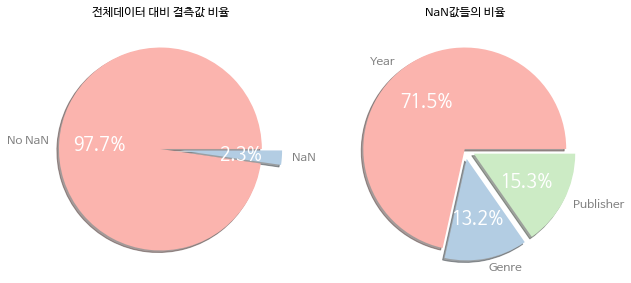

In [14]:
sns.set_context('notebook')
sns.set_palette('Pastel1')

fig, ax = plt.subplots(1,2,figsize =(10,5))


sizes1 = [16219/16598, 379/16598]
labels1 = ['No NaN','NaN']


pathes, texts, autotexts = ax[0].pie(sizes1,
                                   labels = labels1,
                                   autopct ='%1.1f%%',
                                   shadow = True,
                                   explode = (0, 0.2))

for t in texts:
  t.set_fontsize(12)
  t.set_color('gray')

for t in autotexts:
  t.set_color('white')
  t.set_fontsize(18)

ax[0].set_title('전체데이터 대비 결측값 비율')




sizes2 = [271/379, 50/379, 58/379]
labels2 = ['Year','Genre', 'Publisher']

pathes, texts, autotexts = ax[1].pie(sizes2,
                                   labels = labels2,
                                   autopct ='%1.1f%%',
                                   shadow = True,
                                   explode = (0, 0.1,0.1))

for t in texts:
  t.set_fontsize(12)
  t.set_color('gray')

for t in autotexts:
  t.set_color('white')
  t.set_fontsize(18)

ax[1].set_title('NaN값들의 비율')

plt.show()

NaN값을 비교해 봤더니 전체데이터 대비 NaN값이 2.3% 밖에 되지 않고, 극소수의 NaN값들 안에서도 "Genre"와 "Publisher"는  극히 일부이므로 NaN값을 처리하는데 있어서 drop을 해주는것이 좋다고 판단했다. 극히 일부의 NaN값을 위해 결측값처리의 방법론을 활용하여 넣어준다해도 오차가 생기는데 이러한 데이터 결측처리를 위해서 오차를 허용하면서 할 필요성을 느끼지 못하여 과감하게 drop해준다.

반면 Year역시 전체데이터와 비교했을때 극히 일부의 데이터에 불과하지만 "Genre"와 "Publisher" 를 같이 비교했을땐 비중이 높다 하지만 앞에서 이 둘을 drop처리했기때문에 같이 drop처리를 해준다.

(아주 작은데이터 라도 무시할 수 없지만 극히 일부의 데이터를 위해 필요이상의 시간을 낭비하는것 또한 비효율이라고 생각했다.)

Year, Genre, Publisher 전처리

In [15]:
# Year, Genre, Publisher 세개의 feature에 빈값이 있는 행 제거
dataset = dataset.dropna(subset = ['Genre'], axis = 0, how = 'any')
dataset = dataset.dropna(subset = ['Publisher'], axis = 0, how = 'any')
dataset = dataset.dropna(subset = ['Year'], axis = 0, how = 'any')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [17]:
# Year데이터 int형 변환
dataset['Year'] =dataset['Year'].astype(int)
dataset['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16241, dtype: int64

In [18]:
dataset.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

대륙별 출고량 전처리

In [19]:
# 대륙별 출고량 데이터 확인하기
dataset.iloc[:,5:].head(50)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
5,0,0,0.14,0
6,0.02,0.01,0,0
7,0.07,0,0.11,0.01
8,0,0,0.04,0
9,0.04,0.03,0,0.01


In [20]:
# (Index가 random하게 섞여있어) "Keyerror" 해결을 위한 index 재설정
dataset = dataset.reset_index()
dataset = dataset.drop('index',axis = 1)
dataset.iloc[:,5:].head(50)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
5,0,0,0.14,0
6,0.02,0.01,0,0
7,0.07,0,0.11,0.01
8,0,0,0.04,0
9,0.04,0.03,0,0.01


In [21]:
# 전체데이터 단위 통일


pd.options.mode.chained_assignment = None

# 단위 변환 함수(XK ->0.001X/ M -> 1)
def convert(column):
  for i in range(len(column)):
    if (str(type(column[i]))=="<class 'str'>"):
      if (column[i].find('K') != -1):
        column[i] = re.sub('K','',column[i])
        column[i] = float(column[i])
        column[i] *= 0.001
      elif (column[i].find('M') != -1):
        column[i] = re.sub('M','',column[i])
        column[i] = float(column[i])
  return column



In [22]:
# 데이터 타입 변환(object -> float)
dataset['NA_Sales'] = pd.to_numeric(convert(dataset['NA_Sales']))
dataset['EU_Sales'] = pd.to_numeric(convert(dataset['EU_Sales']))
dataset['JP_Sales'] = pd.to_numeric(convert(dataset['JP_Sales']))
dataset['Other_Sales'] = pd.to_numeric(convert(dataset['Other_Sales']))

In [23]:
# 형변환 확인
dataset.head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


### 이상치 확인 및 처리


In [25]:
# 이상치 확인 함수
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  mask = np.where((data > upper_bound) | (data < lower_bound))

  return mask

find_outlier_by_Tukey(dataset['NA_Sales'])

(array([   90,   105,   119, ..., 16217, 16227, 16234]),)

In [26]:
dataset['NA_Sales'][find_outlier_by_Tukey(dataset['NA_Sales'])[0]].index

Int64Index([   90,   105,   119,   123,   146,   152,   162,   179,   189,
              220,
            ...
            16160, 16176, 16183, 16189, 16190, 16191, 16197, 16217, 16227,
            16234],
           dtype='int64', length=1650)

출고량 데이터의 이상치의 발생요인을 세가지로 정리 해 보았다.

1. 독보적인 인기로 인한 이상치
2. 단위 오류로 인한 이상치 발생(Ex)'K'의 누락)
3. 데이터 수집 과정에서의 문제

In [27]:
# 예시로 북미의 인기있는 데이터를 살펴보았다.
dataset.sort_values('NA_Sales',ascending=False).head(50)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
4113,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
10280,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
1187,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
12316,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
3288,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
4253,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67
16176,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26
2959,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85
12837,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55


메가히트작을 아웃라이어로 제거 하는 것 보다 따로 데이터를 나누어 메가히트작의 특징을 분석해 보고 일반 작품의 특성과 비교를 해봄으로서 새로운 인사이트를 도출 해 보자

즉 데이터를 각 지역별 메가히트작 4개의 데이터 프레임과 전체 데이터프레임1개
해서 총 5개의 데이터프레임을 분포시킨다.

In [28]:
Megahit_NA = dataset['NA_Sales'][find_outlier_by_Tukey(dataset['NA_Sales'])[0]].index # 북미
Megahit_EU = dataset['EU_Sales'][find_outlier_by_Tukey(dataset['EU_Sales'])[0]].index # 유럽
Megahit_JP = dataset['JP_Sales'][find_outlier_by_Tukey(dataset['JP_Sales'])[0]].index # 일본
Megahit_Other = dataset['Other_Sales'][find_outlier_by_Tukey(dataset['Other_Sales'])[0]].index # 다른국가



In [29]:
# 북미
Megahit_N = []

for i in Megahit_NA:
  Megahit_N.append(i)

Megahit_N 


# 유럽
Megahit_E = []

for i in Megahit_EU:
  Megahit_E.append(i)

Megahit_E 


# 일본
Megahit_J = []

for i in Megahit_JP:
  Megahit_J.append(i)

Megahit_J 

# 다른국가
Megahit_O = []

for i in Megahit_Other:
  Megahit_O.append(i)

Megahit_O 

[20,
 24,
 105,
 119,
 123,
 162,
 164,
 189,
 190,
 220,
 237,
 256,
 287,
 329,
 333,
 338,
 371,
 372,
 378,
 437,
 438,
 448,
 450,
 466,
 478,
 479,
 482,
 483,
 491,
 494,
 503,
 511,
 514,
 529,
 531,
 553,
 560,
 561,
 568,
 577,
 586,
 593,
 594,
 595,
 612,
 613,
 619,
 623,
 630,
 653,
 663,
 672,
 673,
 689,
 726,
 735,
 745,
 751,
 758,
 768,
 784,
 787,
 835,
 836,
 858,
 906,
 923,
 925,
 937,
 948,
 950,
 956,
 959,
 966,
 973,
 992,
 1000,
 1017,
 1021,
 1030,
 1031,
 1033,
 1059,
 1082,
 1086,
 1091,
 1101,
 1124,
 1131,
 1143,
 1150,
 1154,
 1164,
 1187,
 1204,
 1222,
 1223,
 1234,
 1242,
 1244,
 1254,
 1263,
 1266,
 1282,
 1290,
 1292,
 1294,
 1298,
 1304,
 1338,
 1343,
 1352,
 1353,
 1364,
 1378,
 1391,
 1392,
 1401,
 1405,
 1418,
 1469,
 1485,
 1489,
 1490,
 1513,
 1516,
 1544,
 1549,
 1554,
 1575,
 1582,
 1586,
 1591,
 1599,
 1601,
 1606,
 1610,
 1636,
 1647,
 1677,
 1701,
 1734,
 1745,
 1766,
 1780,
 1810,
 1822,
 1842,
 1851,
 1862,
 1872,
 1877,
 1881,
 1892,


In [30]:
# 북미
Megadata_NA = []
for i in Megahit_N:
  Megadata_NA.append(dataset.iloc[i,:])
# 유럽
Megadata_EU = []
for i in Megahit_E:
  Megadata_EU.append(dataset.iloc[i,:])
# 일본
Megadata_JP = []
for i in Megahit_J:
  Megadata_JP.append(dataset.iloc[i,:])
  
# 다른지역
Megadata_Other = []
for i in Megahit_O:
  Megadata_Other.append(dataset.iloc[i,:])

In [31]:
# 북미
Megadata_NA = pd.DataFrame(Megadata_NA)
Megadata_NA = Megadata_NA.reset_index()
Megadata_NA = Megadata_NA.drop('index', axis =1)
Megadata_NA
# 유럽
Megadata_EU = pd.DataFrame(Megadata_EU)
Megadata_EU = Megadata_EU.reset_index()
Megadata_EU = Megadata_EU.drop('index', axis =1)
Megadata_EU
# 일본
Megadata_JP = pd.DataFrame(Megadata_JP)
Megadata_JP = Megadata_JP.reset_index()
Megadata_JP = Megadata_JP.drop('index', axis =1)
Megadata_JP
# 다른국가 
Megadata_Other = pd.DataFrame(Megadata_Other)
Megadata_Other = Megadata_Other.reset_index()
Megadata_Other = Megadata_Other.drop('index', axis =1)
Megadata_Other


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Ty the Tasmanian Tiger,PS2,2002,Platform,Electronic Arts,0.57,0.45,0.00,0.15
1,Injustice: Gods Among Us,PS3,2013,Fighting,Warner Bros. Interactive Entertainment,0.48,0.53,0.01,0.23
2,Madden NFL 2001,PS2,2000,Sports,Electronic Arts,1.19,0.07,0.05,0.20
3,Call of Duty 4: Modern Warfare,X360,2007,Shooter,Activision,5.91,2.38,0.13,0.90
4,Mortal Kombat,PS3,2011,Fighting,Warner Bros. Interactive Entertainment,1.98,0.55,0.00,0.32
...,...,...,...,...,...,...,...,...,...
1631,Left 4 Dead,X360,2008,Shooter,Electronic Arts,2.66,0.50,0.05,0.30
1632,Wall-E,Wii,2008,Platform,THQ,0.51,0.40,0.00,0.11
1633,Finding Nemo,PS2,2003,Action,THQ,1.26,0.60,0.05,0.18
1634,LEGO Indiana Jones 2: The Adventure Continues,Wii,2009,Action,Activision,0.91,0.39,0.00,0.13


< 현재 생성된 데이터 프레임 정리 >

원본 데이터 프레임 : dataset

미국 인기 출고량 데이터 프레임 : Megadata_NA

유럽 인기 출고량 데이터 프레임 : Megadata_EU

일본 인기 출고량 데이터 프레임 : Megadata_JP

다른지역 인기 출고량 데이터 프레임 : Megadata_Other

In [32]:
Megadata_EU.sort_values('EU_Sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
331,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
1562,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
395,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
1394,Nintendogs,DS,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75
411,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14
...,...,...,...,...,...,...,...,...,...
720,Golf,NES,1984,Sports,Nintendo,1.22,0.28,2.46,0.04
748,EA Sports Active 2,PS3,2010,Sports,Electronic Arts,0.52,0.28,0.00,0.12
1884,F1 2013,X360,2013,Racing,Codemasters,0.01,0.28,0.00,0.03
861,Naruto: The Broken Bond,X360,2008,Action,Ubisoft,0.24,0.28,0.00,0.07


## EDA

### 지역에 따라서 선호하는 게임 장르가 다를까?

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

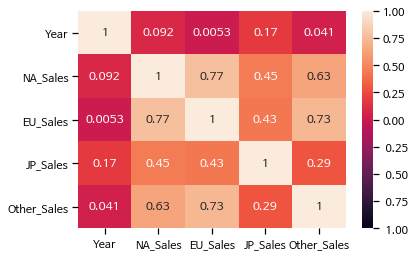

In [33]:
# 출고량과 지역간의 상관관계 (선호도 = 출고량)
sns.set_context('notebook')

sns.heatmap(abs(dataset.corr()),vmin = -1, vmax = 1,annot = True)

"북미와 유럽" 의 출고량과 "유럽과 기타다른지역" 과의 출고량이 70% 이상의 상관관계를 나타내고 있다. 

In [34]:
# 장르와 지역만 묶어서 확인하기
dataset.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


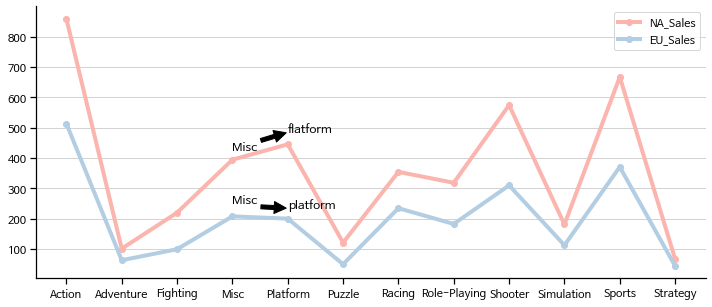

In [35]:
# 북미와 유럽 데이터 비교
sns.set_context('notebook')
fig, ax= plt.subplots(figsize = (12, 5))

region = ['NA_Sales', 'EU_Sales']

for i in region:
  ax.plot(dataset.groupby('Genre')[i].sum(),'o-',label = i,lw = 4)

ax.grid(axis="y", c="lightgray")
ax.spines[[ "top", "right"]].set_visible(False)

plt.text('Platform',235, 'platform')
plt.annotate('Misc', xy=('Platform',235), xytext=('Misc',250), arrowprops=dict(facecolor='black', shrink=0.05))

plt.text('Platform',485, 'flatform')
plt.annotate('Misc', xy=('Platform',485), xytext=('Misc',425), arrowprops=dict(facecolor='black', shrink=0.05))


ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['NA_Sales','EU_Sales'])
plt.legend()


북미와 유럽시장에서는 Platform을 제외하고는 선호도 순위가 같다.

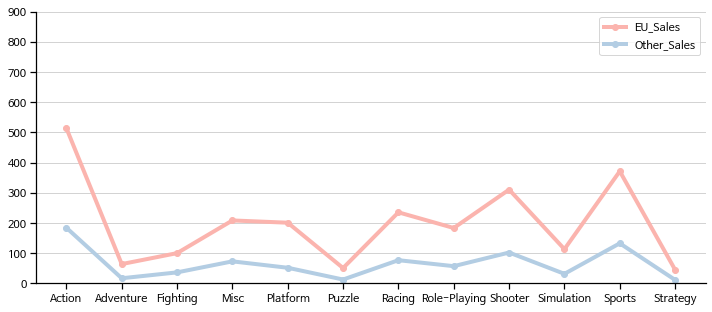

In [36]:
# 유럽과 기타지역 데이터 비교
sns.set_context('notebook')
fig, ax= plt.subplots(figsize = (12, 5))

region = ['EU_Sales', 'Other_Sales']

for i in region:
  ax.plot(dataset.groupby('Genre')[i].sum(),'o-',label = i,lw = 4)
  ax.set_ylim(0, 900)

ax.grid(axis="y", c="lightgray")
ax.spines[[ "top", "right"]].set_visible(False)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['EU_Sales','Other_Sales'])
plt.legend()

유럽과 기타다른지역간의 선호도 순위 또한 비슷한 것으로 집계되었다.


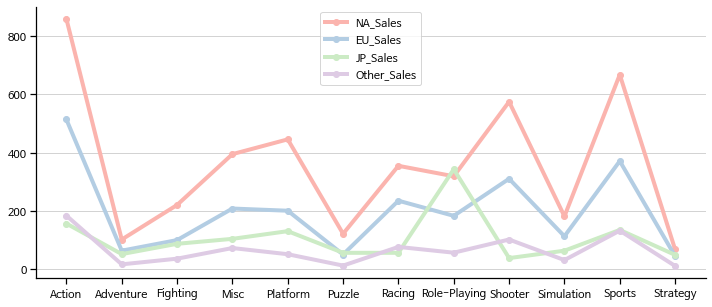

In [37]:
# 4개 지역 데이터 비교
sns.set_context('notebook')
fig, ax= plt.subplots(figsize = (12, 5))

region = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

for i in region:
  ax.plot(dataset.groupby('Genre')[i].sum(),'o-',label = i,lw = 4)

ax.grid(axis="y", c="lightgray")
ax.spines[[ "top", "right"]].set_visible(False)


ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'])
plt.legend()

일본은 다른장르에 비해 Role-Playing이 월등하다. 좀 더 자세하게 확인해 보기 위해 가장 선호도 높은 5개의 장르를 지역별로 추출해 보자

In [38]:
# 지역별 Top5 값과 라벨 뽑기

NA_Top = dataset.groupby('Genre')['NA_Sales'].sum().sort_values(ascending = False).iloc[:5].values
NA_Top = NA_Top.tolist()

EU_Top = dataset.groupby('Genre')['EU_Sales'].sum().sort_values(ascending = False).iloc[:5].values
EU_Top  = EU_Top .tolist()

JP_Top = dataset.groupby('Genre')['JP_Sales'].sum().sort_values(ascending = False).iloc[:5].values
JP_Top = JP_Top.tolist()

Other_Top = dataset.groupby('Genre')['Other_Sales'].sum().sort_values(ascending = False).iloc[:5].values
Other_Top = Other_Top.tolist()


NA_Top_label = dataset.groupby('Genre')['NA_Sales'].sum().sort_values(ascending = False).iloc[:5].index
NA_Top_label = NA_Top_label.tolist()

EU_Top_label = dataset.groupby('Genre')['EU_Sales'].sum().sort_values(ascending = False).iloc[:5].index
EU_Top_label = EU_Top_label.tolist()

JP_Top_label = dataset.groupby('Genre')['JP_Sales'].sum().sort_values(ascending = False).iloc[:5].index
JP_Top_label = JP_Top_label.tolist()

Other_Top_label = dataset.groupby('Genre')['Other_Sales'].sum().sort_values(ascending = False).iloc[:5].index
Other_Top_label = Other_Top_label.tolist()

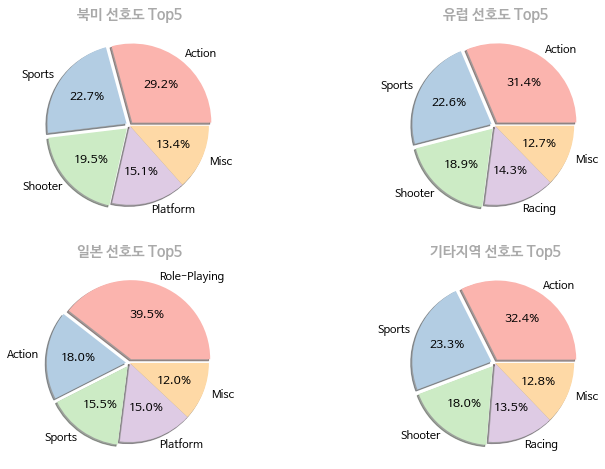

In [39]:
# 지역별 선호하는 장르 Top5
sns.set_context('notebook')

fig, ax = plt.subplots(2,2,figsize = (12,8))

pathes, texts, autotexts = ax[(0,0)].pie(NA_Top,
                                  labels = NA_Top_label,
                                  autopct = "%1.1f%%",
                                  shadow = True,
                                  explode = (0.05,0.05,0.05,0,0))
ax[(0,0)].set_title('북미 선호도 Top5',fontweight="bold", fontsize="large", color="darkgray", pad=8)

pathes, texts, autotexts = ax[(0,1)].pie(EU_Top,
                                  labels = EU_Top_label,
                                  autopct = "%1.1f%%",
                                  shadow = True,
                                  explode = (0.05,0.05,0.05,0,0))
ax[(0,1)].set_title('유럽 선호도 Top5',fontweight="bold", fontsize="large", color="darkgray", pad=8)

pathes, texts, autotexts = ax[(1,0)].pie(JP_Top,
                                  labels = JP_Top_label,
                                  autopct = "%1.1f%%",
                                  shadow = True,
                                  explode = (0.05,0.05,0.05,0,0))
ax[(1,0)].set_title('일본 선호도 Top5',fontweight="bold", fontsize="large", color="darkgray", pad=8)

pathes, texts, autotexts = ax[(1,1)].pie(Other_Top,
                                  labels = Other_Top_label,
                                  autopct = "%1.1f%%",
                                  shadow = True,
                                  explode = (0.05,0.05,0.05,0,0))
ax[(1,1)].set_title('기타지역 선호도 Top5',fontweight="bold", fontsize="large", color="darkgray", pad=8);

인사이트 

- 북미와 유럽시장의 선호도는 매우 비슷하다.Action과 Sports 두장르가 50% 이상을 차지하며 다른 점으로는 선호도 4번째 순위가 북미는 Platform이지만 유럽은 Racing이 차지하고 있다.
- 유럽과 기타지역들간의 선호도 집계 또한 매우 비슷하다. (특히 선호하는 Top5의 장르가 같으며, 그 비율 또한 오차범위 1%이내에서 똑같다,)
- 지역별 선호도 Top5를 뽑아본 결과 일본을 제외하고는 Action과 Sports가 50프로이상을 차지하고 있으며 일본은 Role-Playing이 다른 장르에 비해 압도적이다.
특히 다른 지역들에서 압도적으로 나타난 Action과 Sports를 합친것이  Role_Playing보다 작다는 결과이다.

###해야함)지역별 선호하는 게임 플랫폼은 다를까?

In [40]:
dataset.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(by = ['NA_Sales'], ascending = False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
X360,593.78,277.90,12.29,84.62
PS2,568.54,332.03,134.10,187.77
Wii,495.10,260.78,65.79,78.48
PS3,388.00,339.71,78.56,140.47
DS,387.93,194.05,174.97,60.24
PS,333.79,211.75,139.09,40.53
XB,179.24,58.37,1.38,8.31
GBA,178.26,72.43,46.56,7.51
N64,138.34,40.67,33.47,4.28


### 연도별 게임의 트렌드가 있을까??

In [41]:
# 전체 출고량 컬럼 생성
Total_Sales = []
for i in range(16241):
  Total_Sales.append(dataset['NA_Sales'][i] + dataset['EU_Sales'][i] + dataset['JP_Sales'][i] + dataset['Other_Sales'][i])

Total_Sales

[0.04,
 0.18000000000000002,
 0.02,
 0.04,
 0.25,
 0.14,
 0.03,
 0.19,
 0.04,
 0.08,
 0.8700000000000001,
 0.19,
 0.02,
 0.02,
 0.02,
 0.36000000000000004,
 0.04,
 0.03,
 0.05,
 0.02,
 1.17,
 0.11,
 0.1,
 0.01,
 1.25,
 0.03,
 0.05,
 0.29000000000000004,
 0.08,
 0.26,
 0.05,
 0.16,
 0.01,
 0.59,
 0.44,
 0.3999999999999999,
 0.27,
 0.13,
 0.24,
 0.8600000000000001,
 0.03,
 0.67,
 0.05,
 0.93,
 0.33000000000000007,
 0.12,
 0.13,
 0.16999999999999998,
 0.25,
 0.19,
 0.07,
 0.7000000000000001,
 0.05,
 0.35,
 0.05,
 0.03,
 0.56,
 1.03,
 0.05,
 0.48000000000000004,
 0.29000000000000004,
 0.13,
 0.01,
 0.37,
 1.04,
 0.05,
 0.27,
 0.19,
 0.27,
 0.04,
 0.16000000000000003,
 0.29000000000000004,
 0.16,
 0.09,
 0.51,
 0.63,
 0.11,
 0.01,
 0.11,
 0.18000000000000002,
 0.15000000000000002,
 0.25,
 0.16,
 0.34,
 0.89,
 0.1,
 0.42,
 0.4,
 0.11000000000000001,
 0.18000000000000002,
 1.07,
 0.11,
 0.05,
 0.09000000000000001,
 0.02,
 0.76,
 0.6399999999999999,
 1.17,
 0.08,
 0.19,
 0.13,
 0.07,
 0.249999

In [42]:
# 컬럼 적용
dataset['Total_Sales'] = Total_Sales
dataset

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [43]:
# year가 2020인 행 지우기
year_delete = dataset[dataset['Year']==2020].index
dataset.drop(year_delete, inplace=True)

#### 연도별 게임의 출고량

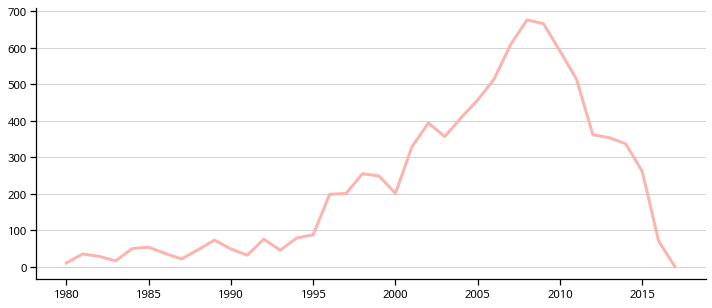

In [44]:
# 연도별 게임의 출고량


fig, ax = plt.subplots(figsize =(12,5))
ax.plot(dataset.groupby('Year')['Total_Sales'].sum(),lw = 3)
ax.grid(axis="y", c="lightgray")
ax.spines[[ "top", "right"]].set_visible(False)


2005년에서 2010년 가장많은 출고량의 상승변화가 있었다.
이 기간에 무슨일이 있었는지 알아보자.

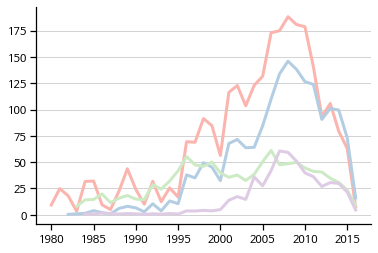

In [45]:
# 년도별 히트작장르에 따른 출고량
fig, ax = plt.subplots()

ax.plot(Megadata_NA.groupby('Year')['NA_Sales'].sum(),lw = 3)
ax.plot(Megadata_EU.groupby('Year')['EU_Sales'].sum(),lw = 3)
ax.plot(Megadata_JP.groupby('Year')['JP_Sales'].sum(),lw = 3)
ax.plot(Megadata_Other.groupby('Year')['Other_Sales'].sum(),lw = 3)

ax.grid(axis="y", c="lightgray")
ax.spines[[ "top", "right"]].set_visible(False)

히트작품이 같은 기간에 출고량이 높아 전체 데이터 역시 동년도에 높은것으로 나온것이 확인되었다.

In [46]:
Megadata_NA.sort_values(by = 'NA_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
257,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46
385,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77
1037,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47
99,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58
1259,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31
307,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96
406,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67
1641,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26
273,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85
1314,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55


대부분 Ninetendo회사의 플랫폼이 선풍적으로 인기를 몰고온것이 큰 요인으로 파악된다.

https://cdn.dailycnc.com/news/photo/201604/55403_164671_144.png

2000년대 비디오게임 신드롬으로 소니의PS2, MS의 XBox와 함께 닌텐도가 시장을 휩쓸었다. 하지만 스마트폰의 발전으로 인해 빠르게 성장하는 모바일시장과 달리 비디오게임시장의 하락세가 시작되었다.

reference: http://www.dailycnc.com/news/articleView.html?idxno=55403

#### 연도별 장르에따른 비디오 게임의 트렌드 분석

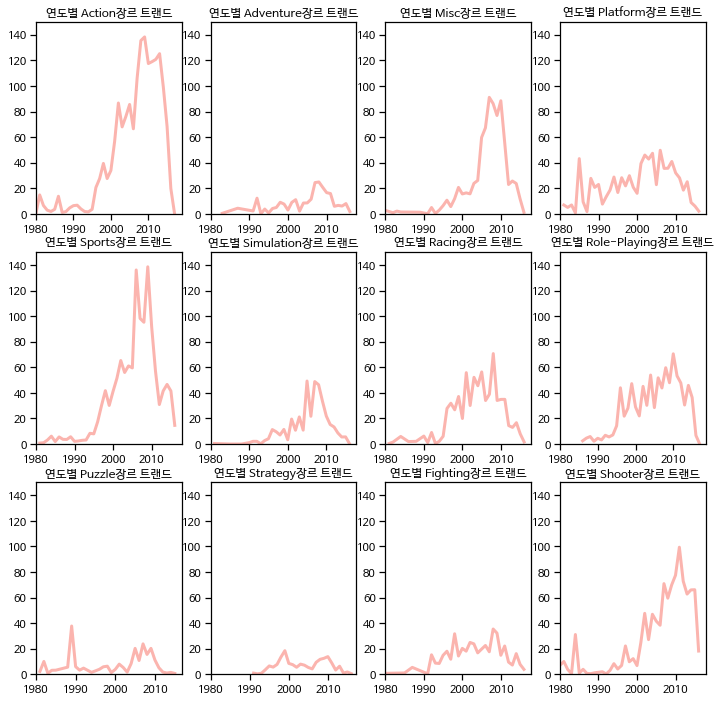

In [47]:
# 연도별 *장르*에따른 비디오 게임의 트렌드 분석
sns.set_context('notebook')

genre = list(dataset['Genre'].unique())
fig, ax = plt.subplots(3,4, figsize = (12, 12))

for i, gen in  enumerate(genre):
  if i <= 3:
    x = 0
  elif i <= 7:
    x = 1
  elif i <= 11:
    x = 2

  y = i % 4

  df = dataset[dataset['Genre']==gen].groupby('Year')['Total_Sales'].sum()
  ax[(x, y)].plot(df,lw=3)
  ax[(x, y)].set_title('연도별 '+gen+'장르 트랜드')
  ax[(x, y)].set_ylim(0, 150)
  ax[(x, y)].set_xlim(1980,)

In [62]:
pd.DataFrame(dataset.groupby('Genre')['Total_Sales'].sum()).sort_values('Total_Sales',ascending= False)

,Total_Sales
Genre,
Action,1712.98
Sports,1305.34
Shooter,1024.75
Role-Playing,901.51
Platform,827.99
Misc,779.70
Racing,722.55
Fighting,443.54
Simulation,388.99


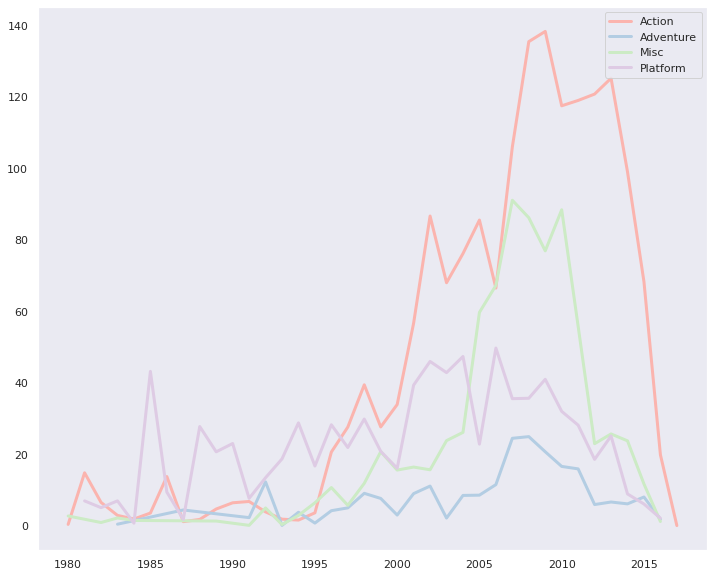

In [83]:
fig, ax =plt.subplots(figsize = (12,10))
genre_list = list(dataset['Genre'].unique())[:4]

for i in genre_list:
  ax.plot(dataset[dataset['Genre']==i].groupby('Year')['Total_Sales'].sum(),label = i, lw =3)

plt.legend()

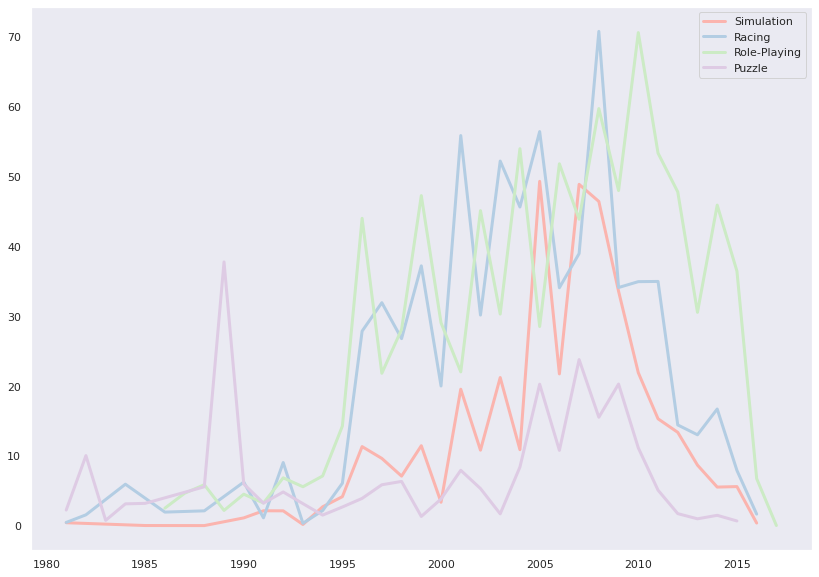

In [66]:
fig, ax =plt.subplots(figsize = (14,10))
genre_list = list(dataset['Genre'].unique())[5:9]

for i in genre_list:
  ax.plot(dataset[dataset['Genre']==i].groupby('Year')['Total_Sales'].sum(),label = i, lw =3)

plt.legend()

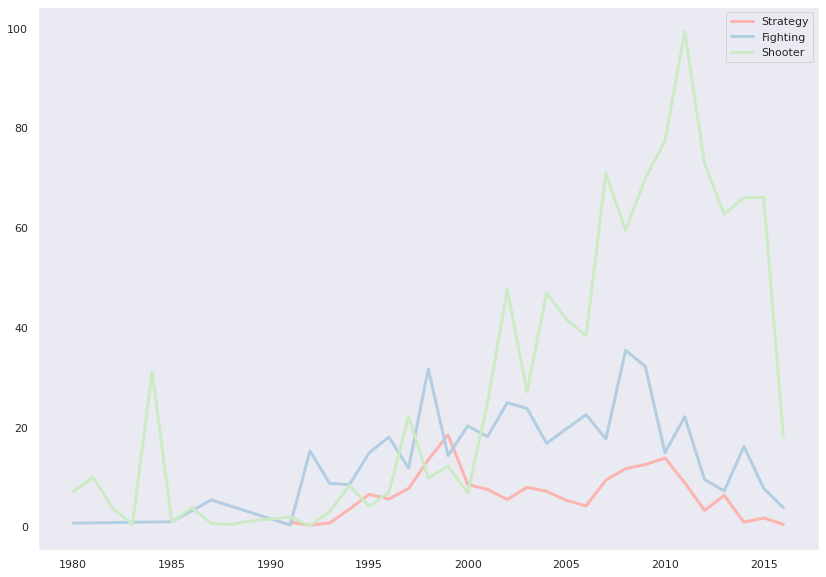

In [67]:
fig, ax =plt.subplots(figsize = (14,10))
genre_list = list(dataset['Genre'].unique())[9:]

for i in genre_list:
  ax.plot(dataset[dataset['Genre']==i].groupby('Year')['Total_Sales'].sum(),label = i, lw =3)

plt.legend()

Racing이 2000년도부터 왜 상승했는가? , Puzzle이 90년도에 왜


#### 연도별 플랫폼에 따른 비디오 게임의 트렌드 분석

In [48]:
# 플랫폼 별로 총 출고량 확인
pd.DataFrame(dataset.groupby('Platform')['Total_Sales'].sum()).sort_values('Total_Sales',ascending= False)

,Total_Sales
Platform,
PS2,1222.44
X360,968.59
PS3,946.74
Wii,900.15
DS,816.90
PS,725.16
GBA,304.76
PSP,290.84
PS4,275.78


Top6 까지의 출고량에 비해 그 이하의 출고량은 크게 차이가 나기 때문에 트렌드를 이끄는데 영향이 미약하므로 Top6개를 살펴본다.

In [49]:
pd.DataFrame(dataset[dataset['Year']>=2000].groupby('Platform')['Total_Sales'].sum()).sort_values('Total_Sales',ascending= False).iloc[:6]

,Total_Sales
Platform,
PS2,1222.44
X360,968.59
PS3,946.74
Wii,900.15
DS,816.88
GBA,304.76


In [50]:
dataset[dataset['Platform']=='PS2'].groupby('Year')['Total_Sales'].sum()

Year
2000     39.17
2001    163.73
2002    205.38
2003    184.31
2004    210.47
2005    160.66
2006     97.47
2007     75.99
2008     53.29
2009     26.40
2010      5.12
2011      0.45
Name: Total_Sales, dtype: float64

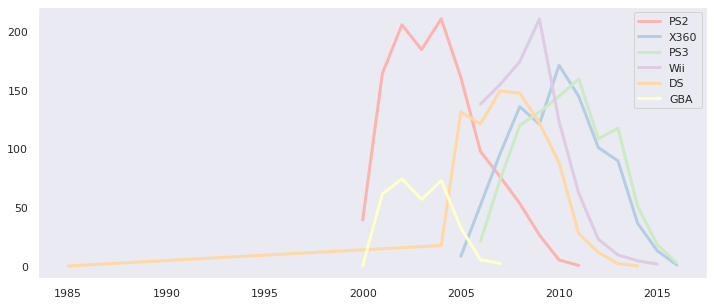

In [51]:
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'GBA']
sns.set_style('dark')

fig, ax = plt.subplots(figsize = (12, 5))

for i in platform_list:
  ax.plot(dataset[dataset['Platform']==i].groupby('Year')['Total_Sales'].sum(),label = i,lw = 3)

plt.legend()

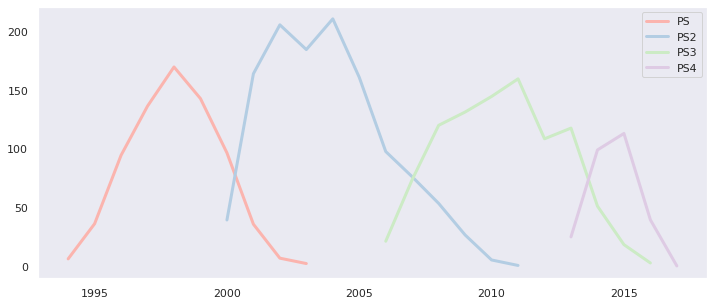

In [52]:
# 시리즈에 따른 분석
series_list= ['PS','PS2','PS3','PS4']

fig, ax = plt.subplots(figsize = (12, 5))

for i in series_list:
  ax.plot(dataset[dataset['Platform']==i].groupby('Year')['Total_Sales'].sum(),label = i,lw = 3)

plt.legend()